# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 
from datetime import datetime
import datetime as dt

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

#save the file
output_data_file = "output_data/cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [5]:
datetime.utcfromtimestamp(1669821475).strftime('%d-%m-%Y %H:%M:%S')

'30-11-2022 15:17:55'

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kabwe
Processing Record 2 of Set 1 | shingu
Processing Record 3 of Set 1 | antakya
Processing Record 4 of Set 1 | urumqi
Processing Record 5 of Set 1 | port-gentil
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ceres
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mingaora
Processing Record 12 of Set 1 | bubaque
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | zhanaozen
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | honningsvag
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | cayenne
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | new norfolk
Processing R

Processing Record 41 of Set 4 | margate
Processing Record 42 of Set 4 | gweta
Processing Record 43 of Set 4 | cherskiy
Processing Record 44 of Set 4 | toliary
City not found. Skipping...
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | ola
Processing Record 48 of Set 4 | ahipara
Processing Record 49 of Set 4 | volot
Processing Record 0 of Set 5 | sistranda
Processing Record 1 of Set 5 | kodinar
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | kasongo
Processing Record 4 of Set 5 | iaciara
Processing Record 5 of Set 5 | surt
Processing Record 6 of Set 5 | kirakira
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | butterworth
Processing Record 9 of Set 5 | enshi
Processing Record 10 of Set 5 | henties bay
Processing Record 11 of Set 5 | east london
Processing Record 12 of Set 5 | mazsalaca
Processing Record 13 of Set 5 | hihifo
City not found. Skipping...
Processing Record 14 of Set 

Processing Record 30 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 31 of Set 8 | smolenka
Processing Record 32 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 34 of Set 8 | alegrete
Processing Record 35 of Set 8 | damietta
Processing Record 36 of Set 8 | kanye
Processing Record 37 of Set 8 | andijon
Processing Record 38 of Set 8 | sao jose da coroa grande
Processing Record 39 of Set 8 | north bend
Processing Record 40 of Set 8 | gat
Processing Record 41 of Set 8 | kapoeta
Processing Record 42 of Set 8 | beruwala
Processing Record 43 of Set 8 | inhambane
Processing Record 44 of Set 8 | talnakh
Processing Record 45 of Set 8 | tulagi
Processing Record 46 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 8 | xiongzhou
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | belmonte
Processing Record 0 of Set 9 | nueva guinea
Process

Processing Record 15 of Set 12 | rutland
Processing Record 16 of Set 12 | geraldton
Processing Record 17 of Set 12 | antofagasta
Processing Record 18 of Set 12 | verkhoyansk
Processing Record 19 of Set 12 | saga
Processing Record 20 of Set 12 | sol-iletsk
Processing Record 21 of Set 12 | villa carlos paz
Processing Record 22 of Set 12 | cranbourne
Processing Record 23 of Set 12 | prachin buri
Processing Record 24 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 25 of Set 12 | nhulunbuy
Processing Record 26 of Set 12 | bandarbeyla
Processing Record 27 of Set 12 | sisimiut
Processing Record 28 of Set 12 | storforshei
Processing Record 29 of Set 12 | dubovka
Processing Record 30 of Set 12 | karaul
City not found. Skipping...
Processing Record 31 of Set 12 | deblin
Processing Record 32 of Set 12 | dzheguta
Processing Record 33 of Set 12 | selje
Processing Record 34 of Set 12 | ivanteyevka
Processing Record 35 of Set 12 | baculin
Processing Record 36 of Set 12 | luoyang
Pr

In [12]:
# Convert raw data to dataframe.
city_data_df = pd.DataFrame(city_data)

#show count
city_data_df.count()


City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kabwe,-14.4469,28.4464,299.29,43,0,1.88,ZM,1670050898
1,shingu,33.7333,135.9833,285.86,65,100,2.14,JP,1670050898
2,antakya,36.2066,36.1572,289.90,67,6,0.86,TR,1670050899
3,urumqi,43.8010,87.6005,263.68,79,25,2.00,CN,1670050623
4,port-gentil,-0.7193,8.7815,300.13,89,75,2.06,GA,1670050899


In [14]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.578907,20.495400,285.017652,71.369176,60.887097,3.662133,1.670051e+09
std,33.578548,93.058964,16.014838,22.429941,41.126417,2.832141,7.632199e+01
min,-54.800000,-175.200000,234.960000,10.000000,0.000000,0.000000,1.670050e+09
25%,-9.603925,-65.519025,273.242500,61.000000,14.000000,1.577500,1.670051e+09
50%,24.600350,25.451400,289.400000,77.000000,78.000000,2.880000,1.670051e+09
75%,48.383450,107.410475,298.627500,89.000000,100.000000,4.757500,1.670051e+09
max,78.218600,179.316700,313.140000,100.000000,100.000000,22.360000,1.670051e+09


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kabwe,-14.4469,28.4464,299.29,43,0,1.88,ZM,1670050898
1,shingu,33.7333,135.9833,285.86,65,100,2.14,JP,1670050898
2,antakya,36.2066,36.1572,289.90,67,6,0.86,TR,1670050899
3,urumqi,43.8010,87.6005,263.68,79,25,2.00,CN,1670050623
4,port-gentil,-0.7193,8.7815,300.13,89,75,2.06,GA,1670050899


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [17]:
from datetime import datetime
dateTimeObj = datetime.now()
datestamp = dateTimeObj.strftime("%d-%m-%y")
datestamp 

'03-12-22'

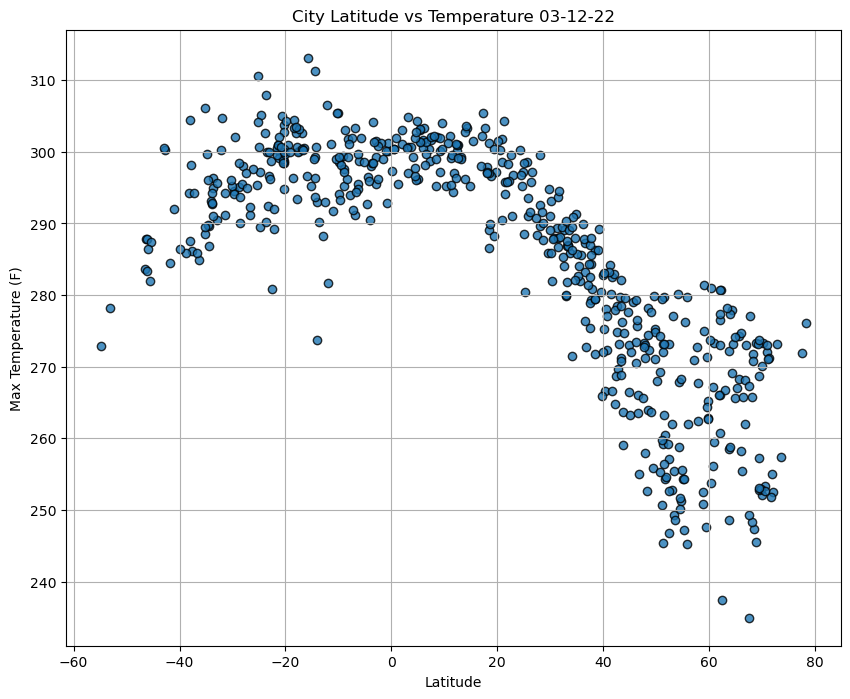

In [18]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Temperature {datestamp}")
plt.grid()

# Save the figure
plt.savefig("Images/latitude_vs_temperature.png", bbox_inches="tight")

# Show plot
plt.show()

Cities closer to the equator have a higher temperature, meaning it will be hot. The further away the city is from the equator, the colder it will be.

#### Latitude Vs. Humidity

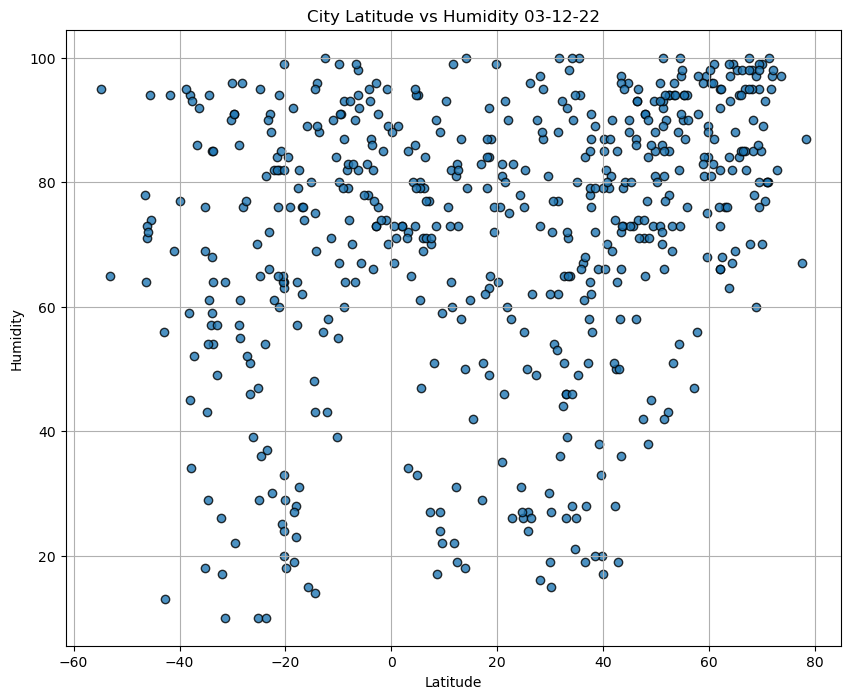

In [19]:
# code for a scatter plot for latitude vs humidity.
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity {datestamp}')
plt.grid()
plt.savefig("Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()


There is no connection between the humidity and the position of the city in relation to the how far it is away from the equator. 

#### Latitude Vs. Cloudiness

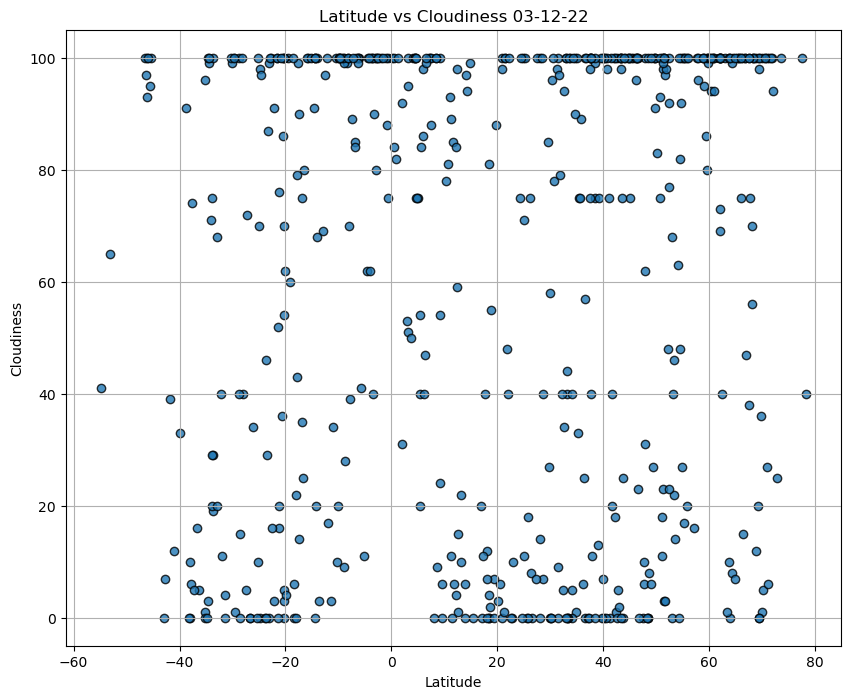

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness {datestamp}')
plt.grid()

# Save the figure
plt.savefig("Images/latitude_vs_cloudiness.png", bbox_inches="tight")

# Show plot
plt.show()


The scatter plot shows there is no significant relation between where the city is located and the density of clouds. 

#### Latitude vs. Wind Speed Plot

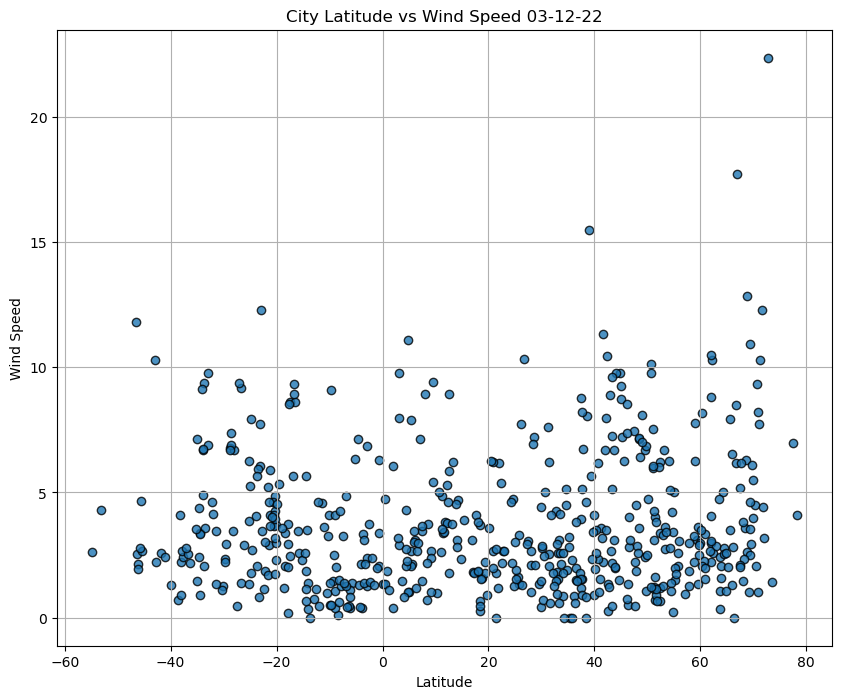

In [21]:
# Build the scatter plots for latitude vs. wind speed
# Create a scatter plot for latitude vs wind speed.
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed {datestamp}')
plt.grid()

# Save the figure
plt.savefig("Images/latitude_vs_wind_speed.png", bbox_inches="tight")

#Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Generate dataframe only for cities in Northern Hemisphere
north_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,shingu,33.7333,135.9833,285.86,65,100,2.14,JP,1670050898
2,antakya,36.2066,36.1572,289.90,67,6,0.86,TR,1670050899
3,urumqi,43.8010,87.6005,263.68,79,25,2.00,CN,1670050623
5,clyde river,70.4692,-68.5914,253.28,77,100,2.06,CA,1670050899
6,albany,42.6001,-73.9662,278.48,64,100,1.34,US,1670050900


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kabwe,-14.4469,28.4464,299.29,43,0,1.88,ZM,1670050898
4,port-gentil,-0.7193,8.7815,300.13,89,75,2.06,GA,1670050899
8,ushuaia,-54.8000,-68.3000,272.96,95,41,2.64,AR,1670050900
9,rikitea,-23.1203,-134.9692,296.64,72,99,6.05,PF,1670050901
12,busselton,-33.6500,115.3333,296.38,54,19,9.39,AU,1670050901


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7225783602511311
The correlation between both factors is -0.85


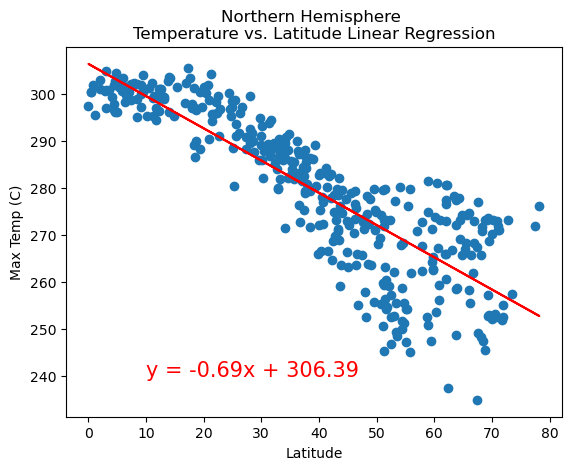

In [24]:
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Max Temp"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 10,240
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Northern Hemisphere \nTemperature vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig("Images/north_temp_vs_lat.png", bbox_inches="tight")
    plt.show()
    
plotlinearregression(x_values, y_values, "Max Temp")

The r-value is: 0.21105448191729054
The correlation between both factors is 0.46


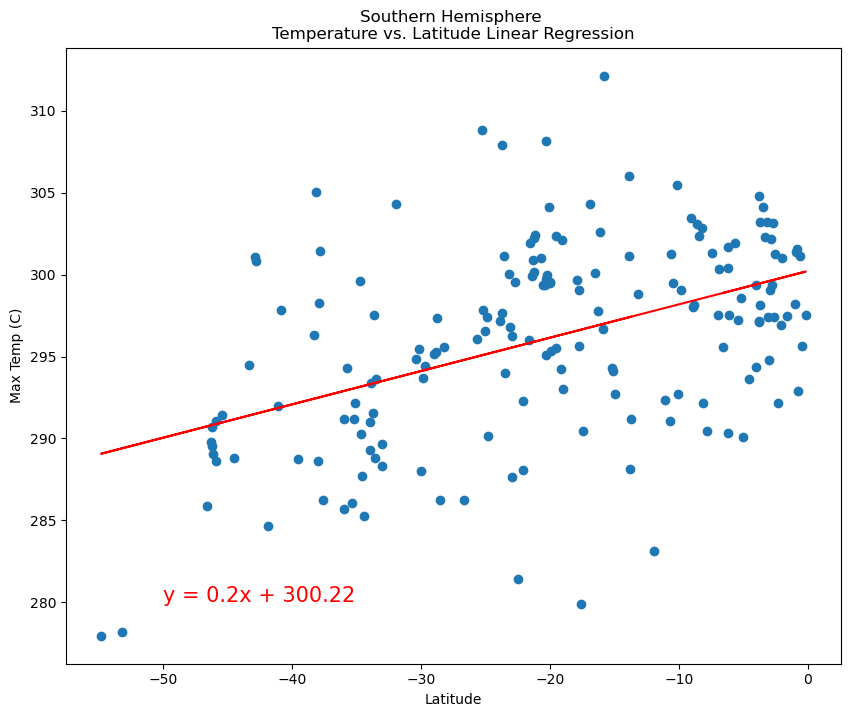

<Figure size 1000x800 with 0 Axes>

In [46]:
# Linear regression on Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Max Temp"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,280
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    plt.title("Southern Hemisphere \nTemperature vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
   
    #plt.figure(figsize=(4,4))
    plt.show()
    plt.savefig("Images/south_temp_vs_lat.png")#, bbox_inches="tight")
    
    
plotlinearregression(x_values, y_values, "Max Temp")

**<ins>Discussion about the linear relationship:<ins/>**  

The linear regression lines and correlation values between latitude (north and south) and maximum temperature show that city latitude is correlated to temperature. This proves the point I had mentioned earlier. The further away we go from the equater(latitude 0) the maximum Temperature (F) will decrease. The closer we get to the equater(latitude 0) the maximum Temperature (F) will increase.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1188049574660821
The correlation between both factors is 0.34


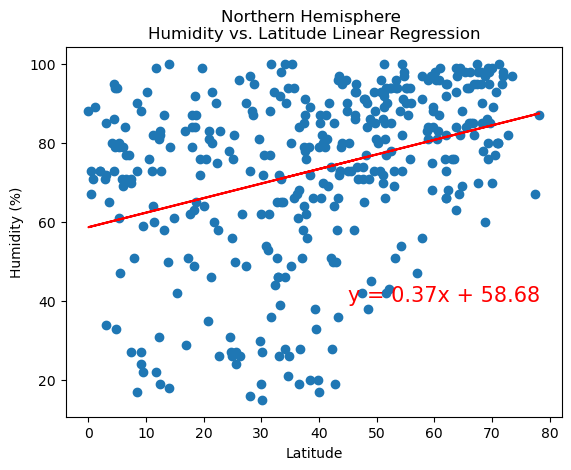

<Figure size 640x480 with 0 Axes>

In [25]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere - Humidity Vs Latitiude

x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Humidity"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 45,40
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Northern Hemisphere \nHumidity vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Humidity")
plt.savefig("Images/North_Humidity_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.11416657505042466
The correlation between both factors is 0.34


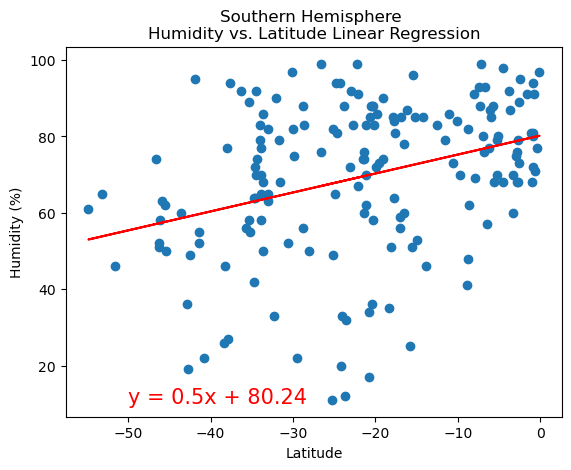

<Figure size 640x480 with 0 Axes>

In [42]:
# Southern Hemisphere
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Humidity"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Southern Hemisphere \nHumidity vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()

plotlinearregression(x_values, y_values, "Humidity")
plt.savefig("Images/south_humidity_vs_lat.png", bbox_inches="tight")
plt.show()


**<ins>Discussion about the linear relationship:<ins/>** 

The above figures show that there is a weak correlation between city location and humidity in a particular area. Humidty can not be measured or predicted when making connections with the Latitude (location). 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024956297899990706
The correlation between both factors is 0.16


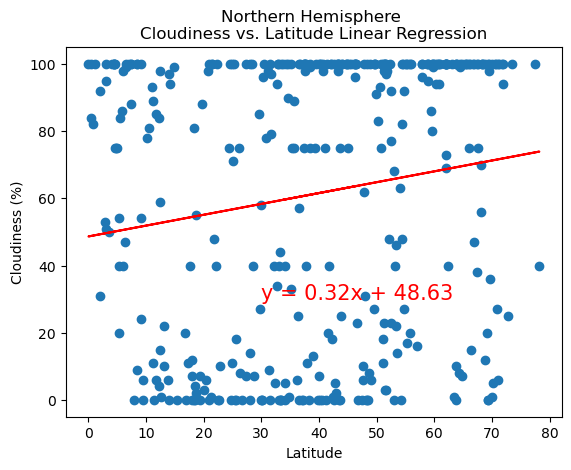

<Figure size 640x480 with 0 Axes>

In [26]:
# Northern Hemisphere
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Cloudiness"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 30,30
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Northern Hemisphere \nCloudiness vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Cloudiness")
plt.savefig("Images/Northern Cloudiness_vs_lat.png", bbox_inches="tight")
plt.show()


The r-value is: 0.08815802768140968
The correlation between both factors is 0.3


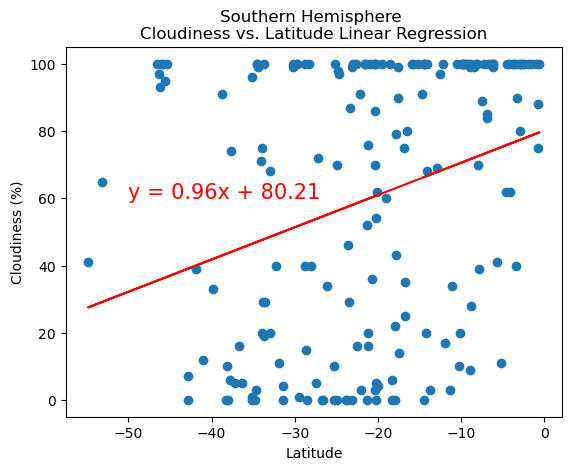

<Figure size 640x480 with 0 Axes>

In [27]:
# Southern Hemisphere
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Cloudiness"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -50,60
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.title("Southern Hemisphere \nCloudiness vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Cloudiness")
plt.savefig("Images/Southern_Hemisphere_Cloudiness_vs_Lat.png", bbox_inches="tight")
plt.show()

**<ins>Discussion about the linear relationship:<ins/>** 

The above figures show that there is a weak correlation between city location and cloudiness. The cloudiness can not be measured or predicted when making connections with the Latitude (location). 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02492856100536199
The correlation between both factors is 0.16


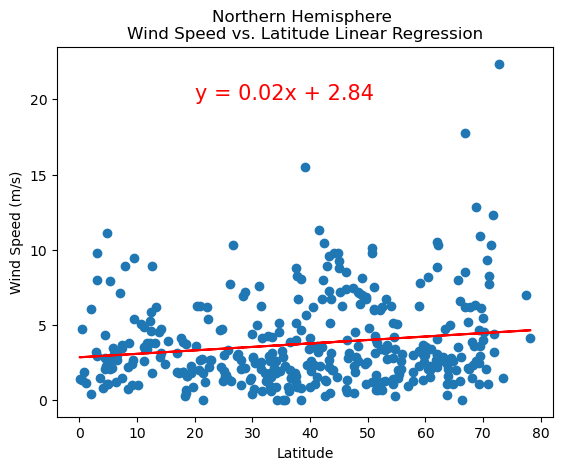

<Figure size 640x480 with 0 Axes>

In [31]:
# Northern Hemisphere
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = pd.to_numeric(north_df["Lat"]).astype(float)
y_values = pd.to_numeric(north_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = 20,20
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Northern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("Images/Northern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

The r-value is: 0.05071151688511263
The correlation between both factors is -0.23


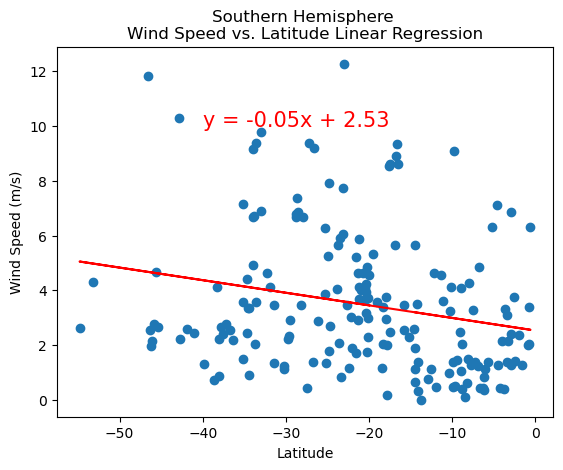

<Figure size 640x480 with 0 Axes>

In [29]:
# Southern Hemisphere
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = pd.to_numeric(south_df["Lat"]).astype(float)
y_values = pd.to_numeric(south_df["Wind Speed"]).astype(float)
    
def plotlinearregression(x_values, y_values, text_coordinates):
    text_coordinates = -40,10
    
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Southern Hemisphere \nWind Speed vs. Latitude Linear Regression")
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.show()
    
plotlinearregression(x_values, y_values, "Wind Speed")
plt.savefig("Images/Southern_Hemisphere_Wind_Speed_vs_lat.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** 

The above figures show that there is a weak correlation between city location and wind speed. The wind speed can not be measured, defined or predicted when making connections with the Latitude (location). 